## Problem Statement

### A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
### The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.
### Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


### Data

### Variable   :                             Definition
### User_ID   :                             User ID
### Product_ID  :                         Product ID
### Gender   :                               Sex of User
### Age    :                                    Age in bins
### Occupation    :                       Occupation (Masked)
### City_Category    :                  Category of the City (A,B,C)
### Stay_In_Current_City_Years   :  Number of years stay in current city
### Marital_Status    :                   Marital Status
### Product_Category_1     :        Product Category (Masked)
### Product_Category_2     :        Product may belongs to other category also (Masked)
### Product_Category_3     :        Product may belongs to other category also (Masked)
### Purchase       :                         Purchase Amount (Target Variable)

### Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".
### Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:
 
### Where y cap is the predicted value and y is the original value.


#### Let us first import all the necessary libraries for our project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix 

#### Let us read our training dataset with the read_csv function from pandas

In [2]:
df = pd.read_csv("C:/Users/Daksha/Desktop/Black Friday Sales Prediction/train.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Let us get to know all the info. from the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Let us check the statistical values of each column

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Right on, we see that Product_ID and User_ID are unique values to a specific record which doesnt determine the outcome(target variabe)

#### So let us drop the two columns 

In [6]:
df.drop(['User_ID', 'Product_ID'], axis=1,inplace=True)

In [7]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365


### Exploratory Data Analysis

#### Now let us check for the null values present in the dataset

In [8]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

#### Here we see two columns Product_Category_2 and Product_Category_3 with huge number of null values

In [9]:
df[df['Product_Category_2'].isnull()]

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
4,M,55+,16,C,4+,0,8,NaN,NaN,7969
9,M,26-35,20,A,1,1,8,NaN,NaN,7871
11,M,26-35,20,A,1,1,8,NaN,NaN,3957
...,...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,F,55+,1,C,2,0,20,NaN,NaN,365


In [10]:
df['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [11]:
df['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [12]:
df['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [13]:
df['Product_Category_2'].mode()

0    8.0
dtype: float64

In [14]:
df['Product_Category_3'].mode()

0    16.0
dtype: float64

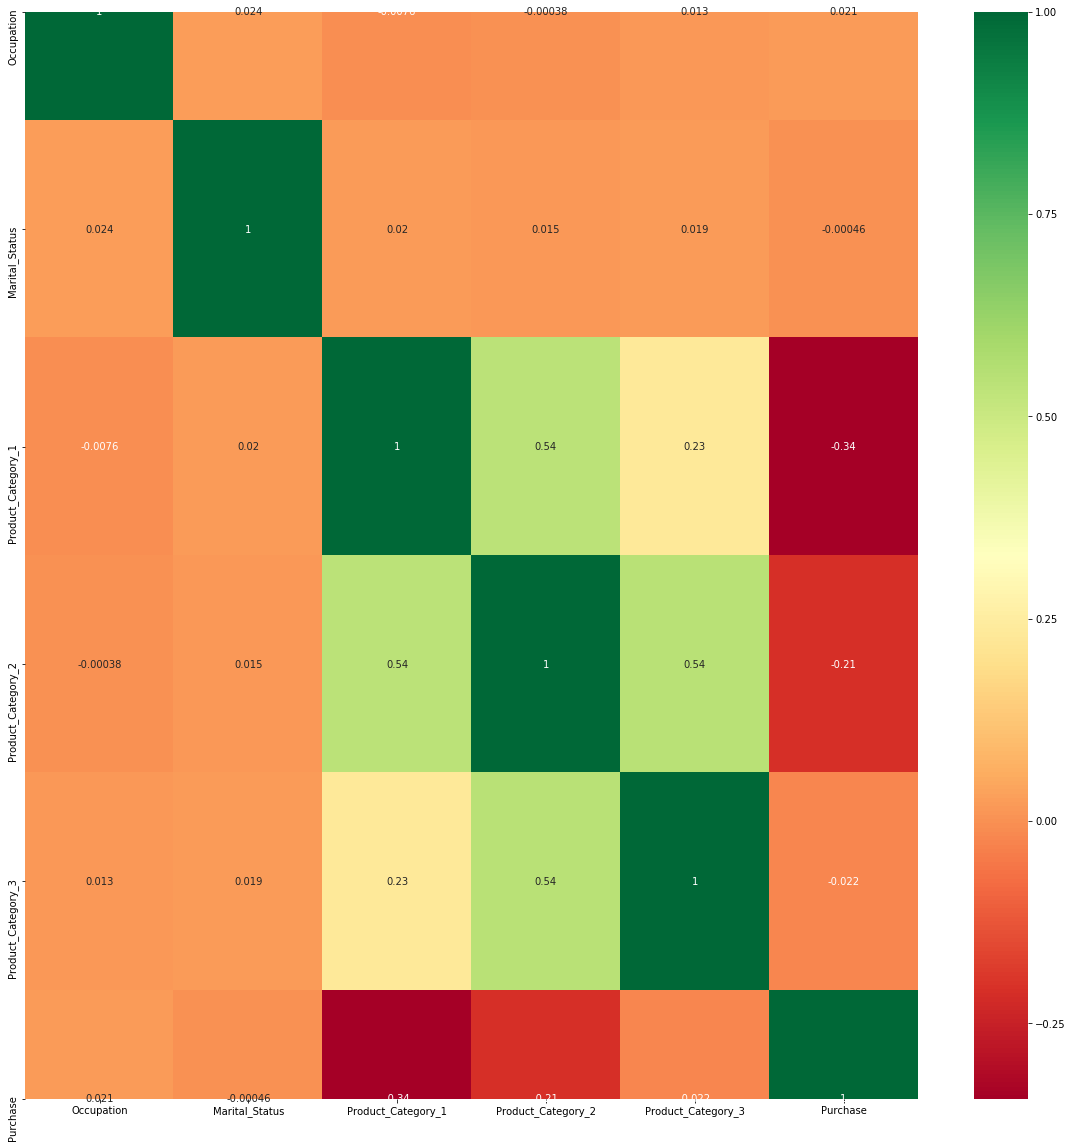

In [15]:
import seaborn as sns

#get correlations of each features in dataset

corrmat = df.corr()

top_corr_features = corrmat.index

plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### Let us fill in null values of Product_Category_2 with the mode of the column i.e the frequently occuring observation
#### We will also capture the importance of the missing values with another column
#### Let us drop Product_Category_3 since nearly 70% values are missing

In [16]:
df['Product_Category_2_null'] = np.where(df['Product_Category_2'].isnull(),1,0)

df['Product_Category_2'].fillna(8.0,inplace=True)
df.drop('Product_Category_3', axis=1,inplace=True)

In [17]:
df.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
Product_Category_2_null       0
dtype: int64

#### We will convert the data type of Product_Category_2 and Product_Category_3 from float to integer

In [18]:
df['Product_Category_2'] = df.Product_Category_2.astype(int)

## Data Visualization

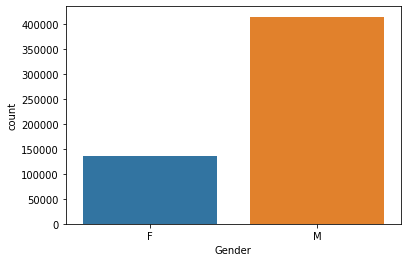

In [19]:
sns.countplot(df['Gender'])

#### The graph shows that there are almost 3 times more male customers than female customers, so the retailer must target more at men for their products

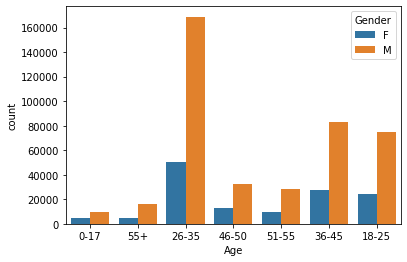

In [20]:
sns.countplot(df['Age'], hue=df['Gender'])

#### Here we can conclude that people of age group 18-45 are the majority customers in which age group 26-35 being the highest . From this we can infer that the retailer must target customers of this specific age group

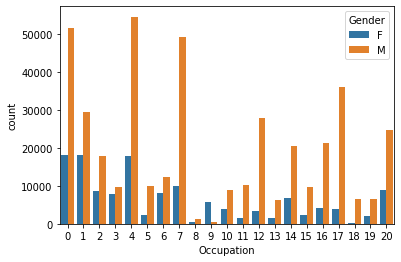

In [21]:
sns.countplot(df['Occupation'], hue=df['Gender'])

#### Male and female customers of occupation type 0 ,4 and 7 have done more number of shopping, so again customers of occupation type 0,4 and 7 must be targeted

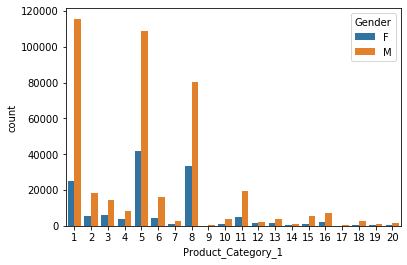

In [22]:
sns.countplot(df['Product_Category_1'], hue=df['Gender'])

#### Products from category 1,5 and 8 are highly preferred by both male and female customers

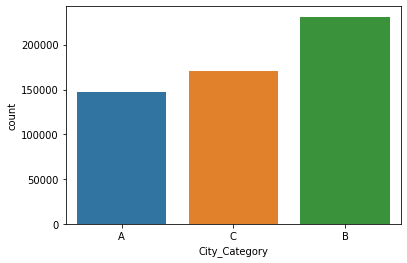

In [23]:
sns.countplot(df['City_Category'])

#### Here we see more number of customers are from City B. This may be due to the closeness of the city to the shop

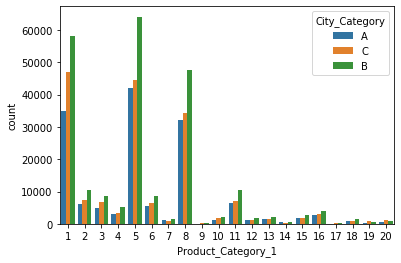

In [24]:
sns.countplot(df['Product_Category_1'], hue=df['City_Category'])

#### In terms of the City_Category, product category 5 has higher demand in city B

#### As we have done our Data Visualization, We will go ahead and do one hot encoding on categorical features

In [25]:
df = pd.get_dummies(df, drop_first=True)

In [26]:
df

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Product_Category_2_null,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,8,8370,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6,15200,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,8,1422,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,12,14,1057,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,16,0,8,8,7969,1,1,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,8,368,1,1,0,0,0,0,1,0,1,0,1,0,0,0
550064,1,0,20,8,371,1,0,0,1,0,0,0,0,0,1,0,0,1,0
550065,15,1,20,8,137,1,0,0,1,0,0,0,0,1,0,0,0,0,1
550066,1,0,20,8,365,1,0,0,0,0,0,0,1,0,1,0,1,0,0


### Check for outliers

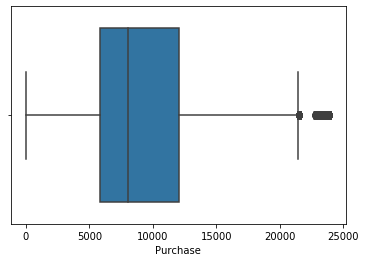

In [27]:
sns.boxplot(df['Purchase'])

#### Ok so we do see some outliers, so let us remove them 

In [28]:
from scipy import stats
z = np.abs(stats.zscore(df['Purchase']))

threshold = 2.33

np.where(z>2.33)
df = df[(z<2.33)]

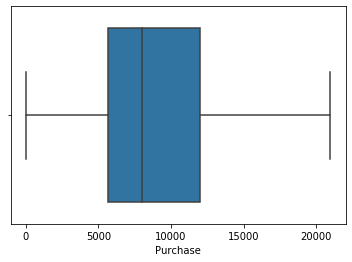

In [29]:
sns.boxplot(df['Purchase'])

#### Now we have removed all the outliers using the Z-score 

#### Let us Seperate our Dependent and Independent features, and split our training and testing data

In [30]:
X = df.drop('Purchase', axis=1)
Y = df['Purchase']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
mm =StandardScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit_transform(X_train)
pca.fit_transform(X_test)

array([[-1.57864887, -0.94320267, -0.8289786 ,  0.4912621 , -0.99258351],
       [-1.18275842, -1.22713866,  1.76095603,  0.00341494,  0.5824976 ],
       [ 2.0679702 , -1.00166156,  0.25283055,  0.25489131, -1.51410476],
       ...,
       [ 1.26936844, -0.73633114,  0.92557075, -1.58415855,  2.52064396],
       [-0.54044649,  1.0601911 ,  0.58874158, -0.29000646, -2.25115279],
       [-0.23148319,  2.48160789,  0.76127722,  0.22877109, -0.85228119]])

#### Let us select various Regressor models and train them using our training dataset

#### For the model which performs the best, we will do hyperparameter tuning to it to increase it's accuracy

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

### Linear Regression

In [36]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)
Y_pred = lin_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE OF LINEAR REGRESSION MODEL IS : ", rmse)

RMSE OF LINEAR REGRESSION MODEL IS :  4491.990866940238


### Lasso Regression

In [37]:
lasso = Lasso(alpha=0.01, normalize=True )
lasso.fit(X_train,Y_train)
Y_pred2 = lasso.predict(X_test)
rmse2 = np.sqrt(mean_squared_error(Y_test,Y_pred2))
print("RMSE OF LASSO REGRESSION MODEL IS : ", rmse2)


RMSE OF LASSO REGRESSION MODEL IS :  4492.498858853591


### Decision Tree Regressor

In [38]:
trees = DecisionTreeRegressor()
trees.fit(X_train,Y_train)
Y_pred3 = trees.predict(X_test)
rmse3 = np.sqrt(mean_squared_error(Y_test,Y_pred3))
print("RMSE OF DECISION TREE REGRESSOR MODEL IS : ", rmse3)



RMSE OF DECISION TREE REGRESSOR MODEL IS :  3089.1176227405513


### Random Forest Regressor

In [39]:
forest = RandomForestRegressor()
forest.fit(X_train,Y_train)
Y_pred5 = forest.predict(X_test)
rmse5 = np.sqrt(mean_squared_error(Y_test,Y_pred5))
print("RMSE OF RANDOM FOREST REGRESSOR MODEL IS : ", rmse5)

C:\Users\Daksha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE OF RANDOM FOREST REGRESSOR MODEL IS :  2991.4085704129297


### Gradient Boosting Regressor

In [40]:
grad = GradientBoostingRegressor()
grad.fit(X_train,Y_train)
Y_pred6 = grad.predict(X_test)
rmse6 = np.sqrt(mean_squared_error(Y_test,Y_pred6))
print("RMSE OF GRADIENT BOOSTING REGRESSOR MODEL IS : ", rmse6)

RMSE OF GRADIENT BOOSTING REGRESSOR MODEL IS :  2959.132292067727


### XGBoost Regressor

In [41]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,Y_train)
Y_pred7 = xg_reg.predict(X_test)
rmse7 = np.sqrt(mean_squared_error(Y_test,Y_pred7))
print("RMSE OF XGBOOST REGRESSOR MODEL IS : ", rmse7)


RMSE OF XGBOOST REGRESSOR MODEL IS :  2880.938441326805


#### Linear and Lasso regressor have very high RMSE value

#### We see that decision tree and random forest regressor show lesser RMSE values

#### Gradient Boosting and XGBoost Regressor show better RMSE values when compared to other models 

### Hyper Parameter Tuning 

#### Let us tune our best performing model i.e XGBoost Regressor to get the best parameters to improve RMSE score

In [42]:
#### Hyper Parameter Optimization

params = {
            "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
            "max_depth" : [3,4,5,6,8,10,12,15],
            "min_child_weight" : [1,3,5,7],
            "gamma" : [0.0,0.1,0.2,0.3,0.4],
            "colsample_bytree" : [0.3,0.4,0.5,0.7] 
}

In [43]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(xg_reg, param_distributions= params, cv=3, n_jobs=-1, verbose=3 )
random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  30 | elapsed:  5.3min remaining:   48.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n...
                                          validate_parameters=1,
                                          verbosity=None),
                   iid='warn', n_iter=10, n_jobs=-1,
             

In [44]:
random.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
random.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.5}

In [46]:
xg_reg2= xgb.XGBRegressor(min_child_weight = 3, max_depth=15, learning_rate=0.1, gamma=0.4, colsample_bytree=0.5)

xg_reg2.fit(X_train,Y_train)
Y_pred8 = xg_reg2.predict(X_test)
rmse8 = np.sqrt(mean_squared_error(Y_test,Y_pred8))
print("RMSE OF XGBOOST REGRESSOR MODEL IS : ",rmse8)


RMSE OF XGBOOST REGRESSOR MODEL IS :  2860.651458354781


#### We are getting an improved RMSE value of 2860.65

#### Residual Plot

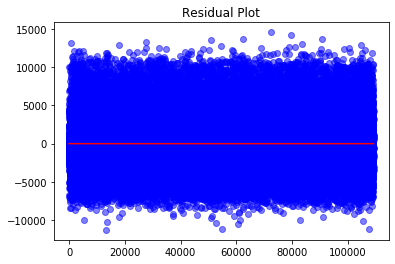

In [47]:
x = [i for i in range(1,len(Y_pred8)+1)]

x_plot = plt.scatter(x,(Y_pred8-Y_test), c='b', alpha=0.5)
plt.plot(x,[0]*len(Y_pred8),c='r')

plt.title("Residual Plot")
plt.show()

## Model Prediction

### Now we are going to use our best model  XGBoost Regressor model with RMSE of 2821 to predict the purchase amount to our unseen dataset

In [69]:
df2 = pd.read_csv("C:/Users/Daksha/Desktop/Black Friday Sales Prediction/test.csv")
df4 = df2

In [70]:
df2.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#### First let us drop User_ID and Product_ID

In [71]:
df2.drop('User_ID', axis=1, inplace=True)
df2.drop('Product_ID', axis=1, inplace=True)

In [72]:
df2.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,M,46-50,7,B,2,1,1,11.0,NaN
1,M,26-35,17,C,0,0,3,5.0,NaN
2,F,36-45,1,B,4+,1,5,14.0,NaN
3,F,36-45,1,B,4+,1,4,9.0,NaN
4,F,26-35,1,C,1,0,4,5.0,12.0


In [73]:
df2.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

#### We will fill in the null values with mode as we did above and remove Product_Category_3

In [76]:
df2['Product_Category_2_null'] = np.where(df2['Product_Category_2'].isnull(),1,0)
df2['Product_Category_2'].fillna(8.0, inplace=True)
df2.drop('Product_Category_3', axis=1,inplace=True)

In [77]:
df2.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_2_null       0
dtype: int64

In [79]:
df2['Product_Category_2'] = df2.Product_Category_2.astype(int)

#### Then we will use get_dummies as above 

In [80]:
df2 = pd.get_dummies(df2, drop_first=True)

In [81]:
df2.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_2_null,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,7,1,1,11,0,1,0,0,0,1,0,0,1,0,0,1,0,0
1,17,0,3,5,0,1,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,5,14,0,0,0,0,1,0,0,0,1,0,0,0,0,1
3,1,1,4,9,0,0,0,0,1,0,0,0,1,0,0,0,0,1
4,1,0,4,5,0,0,0,1,0,0,0,0,0,1,1,0,0,0


In [82]:
df3 = pd.DataFrame(df2)

#### We will use MinMaxScaler as above

In [84]:
from sklearn.preprocessing import StandardScaler
mm= StandardScaler()
df2 = mm.fit_transform(df2)
df2

array([[-0.16644456,  1.19941926, -1.14457076, ...,  2.08785232,
        -0.45552667, -0.42644835],
       [ 1.36703141, -0.83373682, -0.60929217, ..., -0.47896108,
        -0.45552667, -0.42644835],
       [-1.08653014,  1.19941926, -0.07401358, ..., -0.47896108,
        -0.45552667,  2.34494985],
       ...,
       [ 1.06033621,  1.19941926, -1.14457076, ..., -0.47896108,
        -0.45552667,  2.34494985],
       [-1.08653014, -0.83373682,  1.2641829 , ..., -0.47896108,
        -0.45552667,  2.34494985],
       [-1.23987774,  1.19941926, -0.34165288, ..., -0.47896108,
        -0.45552667,  2.34494985]])

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
pca.fit_transform(df2)

array([[-0.20168101,  0.62085417, -0.94502794,  1.34226015,  0.07328126],
       [ 0.74681887, -0.66995324,  2.07533472, -0.62537435, -1.12686003],
       [-0.48090699,  0.09548677, -1.49553482,  1.70539993,  0.68338908],
       ...,
       [-1.38097419,  0.23196641,  1.16894203,  0.50043499, -0.52472163],
       [ 1.98966656,  0.23487803, -0.13423274,  0.82678915,  2.86964036],
       [-0.34594855,  0.81474617, -0.94898661,  0.75167499,  0.63702403]])

### Now it is ready for us to make use of our Best-Scoring XGBoost regressor model to make predictions

In [86]:
pred = xg_reg2.predict(df2)

In [87]:
pred = pd.DataFrame(pred)

In [88]:
pred.rename(columns = {0:"Model_Prediction"})

,Model_Prediction
0,15569.420898
1,11030.389648
2,7200.186035
3,3103.166260
4,2731.716064
...,...
233594,7279.227539
233595,5978.971191
233596,11452.131836
233597,15434.791992


#### Let us concatenate the original dataset with it's corresponding predictions

In [89]:
result = pd.concat([df4,pred], axis=1)

In [90]:
result.rename(columns = {0:"Model_Prediction"}, inplace=True)

## We have Successfully made our predictions 

## Now we will save our predicted dataset to a csv file

In [91]:
path="C:/Users/Daksha/Desktop/SampleSubmissionFinal.csv"
result.to_csv(path, index=False)

## We have Successfully done our project 

## Thank You